<a id="header"></a>
# Part 7: two-minute drills
## (or optimizing over finite horizons)

In [1]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

[Return home](../)

## Table of contents
- <a href="#buff-priority">On buff priority</a>
- <a href="#meikyo-shisui">On Meikyo Shisui</a>
- <a href="#kenki-spending">On Kenki spending</a>
- <a href="#hissatsu-mobility">On Hissatsu: Gyoten / Yaten</a>
- <a href="#third-eye">On Third Eye</a>
- <a href="#hagakure">On Hagakure</a>
- <a href="#higanbana">On Higanbana</a>

<a id="buff-priority"></a>

Samurai, like every other damage-dealing job, needs to know how to optimize its actions for each encounter in order to maximize its damage. While its windup period is significantly shorter compared to, say, Dragoon or Summoner, it still needs to manage a number of resources that dictate a large portion of its damage. While Kenki is steadily gained when executing weaponskill combos, Sen is accrued at a much slower rate by comparison. Taking up to eight GCDs to open all three, Sen requires a lot of invested time to pay off when Hagakure and Meikyo Shisui are not available. Additionally, while certainly powerful in terms of potency per GCD, Higanbana requires a significant amount of time to be worth the investment. 

In this part, we will examine a variety of encounter/phase lengths and investigate the best policies for maximizing damage over each duration. While many battles have extended periods of uptime, it is mastery of the shorter phases that will differentiate performance levels at the top tier.

## Thirty seconds

Thirty second phases are uncommon but are useful to examine as an academic exercise. More likely, this will be useful when considering an encounter that is about to end soon rather than the first phase of an encounter. From investigations in part 5, we know that:

- Thirty seconds is the borderline break-even point of Higanbana.
- We can open about 4-5 Sen without Meikyo Shisui.
- We can only use Hagakure, Meikyo Shisui, and Hissatsu: Guren once.

This short time horizon seems ripe for a standard opener without Higanbana. Here's the design philosophy:

- We can get 1-2 Midare Setsugekka off.
- No Higanbana.
- Maximize the number of Hissatsu: Shinten since they are off the GCD.

We'll look at three options.

In [2]:
sam = Samurai(base_gcd=2.4, kenki_mastery=2, kenki_gauge=0)
actions_1 = [('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
           ('Yukikaze', 'Hissatsu: Guren'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Gekko'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten')]
df_30s_1, _, _ = sam.parse_rotation(actions_1)

sam = Samurai(base_gcd=2.4, kenki_mastery=2, kenki_gauge=0)
actions_2 = [('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
             ('Hakaze'), ('Jinpu'), ('Gekko'),
             ('Hakaze'), ('Yukikaze', 'Meikyo Shisui'),
             ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
             ('Kasha', 'Hissatsu: Guren'), ('Gekko'),
             ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka', 'Hissatsu: Gyoten')]
df_30s_2, _, _ = sam.parse_rotation(actions_2)

sam = Samurai(base_gcd=2.4, kenki_mastery=2, kenki_gauge=0)
actions_3 = [('Hakaze'), ('Shifu'), ('Kasha'),
             ('Hakaze'), ('Jinpu'), ('Gekko'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
             ('Hakaze', 'Hissatsu: Guren'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Meikyo Shisui'),
             ('Yukikaze', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'), 
             ('Midare Setsugekka', 'Hissatsu: Gyoten'), ('Kasha', 'Hissatsu: Yaten')]
df_30s_3, _, _ = sam.parse_rotation(actions_3)

display(df_30s_3)

average potency per GCD = 532.1933333333334
average potency per second = 244.574142157
average potency per GCD = 556.4583333333334
average potency per second = 255.72533701
average potency per GCD = 570.9483333333334
average potency per second = 262.384344363


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,25,1260.000
5,11.04,Gekko,,460.000,True,True,False,0,30,1720.000
6,13.20,Hakaze,"(Hissatsu: Shinten,)",517.500,True,True,False,0,40,2237.500
7,15.36,Yukikaze,"(Hagakure,)",391.000,True,True,False,0,20,2628.500
8,17.52,Hakaze,"(Hissatsu: Guren,)",1212.675,True,True,True,0,90,3841.175
9,19.68,Shifu,"(Hissatsu: Shinten,)",740.370,True,True,True,0,45,4581.545


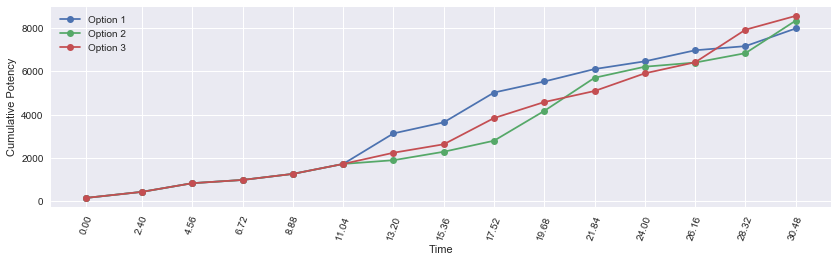

In [3]:
compare_n_potencies([df_30s_1, df_30s_2, df_30s_3], ['Option 1', 'Option 2', 'Option 3'])

#### Option 1
Use Hagakure at one Sen. Use Meikyo Shisui for one of each combo finisher.

#### Option 2
Use Hagakure at one Sen. Use Meikyo Shisui for Gekko/Kasha only. Two Midare Setsugekka. No Hissatsu: Shinten.

#### Option 3
Use Hagakure at three Sen. Use Meikyo Shisui for one of each combo finisher.

I've dumped some Kenki into Hissatsu: Gyoten/Yaten which is inefficient if this isn't the end of the encounter, but it doesn't change the hierarchy of the policies.

Option 1 generates fewer Kenki than the others while only fitting in one Midare Setsugekka, narrowly missing out on the second one by one GCD. Option 2 fits in both Midare Setsugekka but with no Hissatsu: Shinten at all. 

Option 3 generates the most Kenki and the most Hissatsu: Shinten, while still fitting in one Midare Setsugekka. As a result, Option 3 wins out over this short time horizon. Because we only get one Hagakure here, we maximize its utility and get the best return overall.

## One minute
Sixty second phases are a little more common in practice. The extended duration permits the following:

- One use of Meikyo Shisui and Hissatsu: Guren.
- Two uses of Hagakure.
- One acceptable Higanbana.

Here's the design philosphy:

- Use Higanbana early enough such that it's worth it (> 30s of the DoT).
- Use Hagakure early enough so that we can get two uses and spend the resulting Kenki.

In [11]:
sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=0)
actions_1 = [('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
             ('Hakaze'), ('Jinpu'), ('Gekko', 'Meikyo Shisui'),
             ('Yukikaze', 'Hissatsu: Guren'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Gekko'), 
             ('Hakaze', 'Hissatsu: Kaiten'), ('Higanbana'), ('Shifu'), ('Kasha'),
             ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
             ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
             ('Hakaze'), ('Shifu', 'Hagakure'), ('Kasha', 'Hissatsu: Shinten'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Shinten'),
             ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'),
             ('Midare Setsugekka')]
df_60s_1, _, _ = sam.parse_rotation(actions_1)

sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=0)
actions_2 = [('Hakaze'), ('Shifu'), ('Kasha', 'Hagakure'),
             ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Higanbana', 'Meikyo Shisui'),
             ('Yukikaze', 'Hissatsu: Guren'), ('Kasha'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
             ('Hakaze'), ('Shifu'), ('Kasha'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
             ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
             ('Hakaze'), ('Shifu', 'Hagakure'), ('Kasha', 'Hissatsu: Shinten'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hissatsu: Kaiten'), 
             ('Midare Setsugekka')]
df_60s_2, _, _ = sam.parse_rotation(actions_2)

sam = Samurai(base_gcd=2.40, kenki_mastery=2, kenki_gauge=0)
actions_3 = [('Hakaze'), ('Shifu'), ('Kasha'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
             ('Hakaze'), ('Yukikaze', 'Hagakure'),
             ('Hakaze', 'Hissatsu: Guren'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'), ('Higanbana', 'Meikyo Shisui'),
             ('Yukikaze', 'Hissatsu: Shinten'), ('Gekko'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
             ('Hakaze'), ('Jinpu'), ('Gekko'),
             ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze'),
             ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
             ('Hakaze'), ('Yukikaze', 'Hagakure'),
             ('Hakaze', 'Hissatsu: Shinten')]
df_60s_3, _, _ = sam.parse_rotation(actions_3)

display(df_60s_2)

average potency per GCD = 558.1341071428571
average potency per second = 257.374094203
average potency per GCD = 575.4867857142856
average potency per second = 265.375988142
average potency per GCD = 543.5524999999999
average potency per second = 250.650032938


,Time,Weaponskill,Abilities,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,"(Hagakure,)",400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,40,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,45,1260.000
5,11.04,Gekko,"(Hissatsu: Kaiten,)",460.000,True,True,False,0,50,1720.000
6,13.20,Higanbana,"(Meikyo Shisui,)",503.470,True,True,False,0,40,2223.470
7,15.36,Yukikaze,"(Hissatsu: Guren,)",1455.670,True,True,False,1,40,3679.140
8,17.52,Kasha,,554.070,True,True,True,1,0,4233.210
9,19.68,Gekko,"(Hissatsu: Kaiten,)",554.070,True,True,True,1,10,4787.280


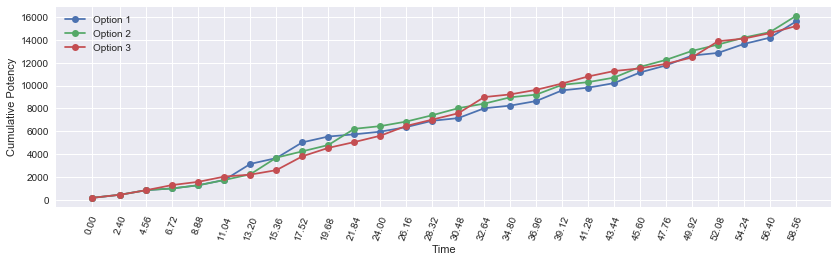

In [9]:
compare_n_potencies([df_60s_1, df_60s_2, df_60s_3], ['Option 1', 'Option 2', 'Option 3'])

#### Option 1
Use first Hagakure at one Sen. Use Meikyo Shisui for one of each combo finisher. Midare Setsugekka before Higanbana. Use second Hagakure at three Sen.

#### Option 2
Same as Option 1 but Higanbana before Midare Setsugekka.

#### Option 3
Use first Hagakure at three Sen. Use Meikyo Shisui for one of each combo finisher. Use second Hagakure at one Sen.

Option 3 leaves a lot of Kenki on the table because of the late first Hagakure. On the other hand, Options 1 and 2 end perfectly with 0 open Sen and 0 remaining Kenki. Because they are identical besides the first two Iaijutsu, Option 2 wins out because it gets more out of its Higanbana. Note that the second Hagakure is a tight fit for Options 1 and 2 at a base GCD of 2.40s. A slightly longer GCD may be necessary to execute the rotation without waiting for the second Hagakure to become available.

<a href="#header">back to the top...</a>